In [1]:
# import pymc3 as pm
from matplotlib import pylab as plt
import pandas as pd
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
# fileName = 'resultados.csv'

fileName = 'resultados liga  - 2024.csv'

In [4]:
# data = pd.read_csv(fileName, delimiter='\t', names=['puntos','PJ','PG','PE','PP','GF','GC'])

data = pd.read_csv(fileName, delimiter=',')
# data.reset_index()

In [5]:
data

,equipo,puntos,pj,pg,pe,pp,gf,gc,yc,rc
0,Vélez Sarsfield,51,27,14,9,4,38,16,57,5
1,Talleres de Córdoba,48,27,13,9,5,34,27,72,4
2,Racing Club,46,27,14,4,9,42,30,62,2
3,Huracán,46,27,12,10,5,28,18,62,3
4,River Plate,43,27,11,10,6,38,21,71,2
5,Boca Juniors,42,27,11,9,7,30,23,76,6
6,Independiente,40,27,9,13,5,25,17,88,7
7,Unión de Santa Fe,40,27,11,7,9,27,26,63,4
8,Atlético Tucumán,40,27,11,7,9,28,27,57,3
9,Platense,39,27,10,9,8,20,18,71,4


In [6]:
data.index.shape

(28,)

In [7]:
data.columns

Index(['equipo', 'puntos', 'pj', 'pg', 'pe', 'pp', 'gf', 'gc', 'yc', 'rc'], dtype='object')

In [8]:
# with model

# pm.Multinomial

In [9]:
pvals = [0.33, 0.33, 0.33]
np.random.multinomial(27, pvals)

array([9, 9, 9])

In [10]:
samples = 100000
res = np.zeros((samples,2))

aux = np.random.multinomial(27, pvals, size=samples)

In [11]:
res = aux[:,0:-1]

In [12]:
res.shape

(100000, 2)

Text(0, 0.5, 'PG')

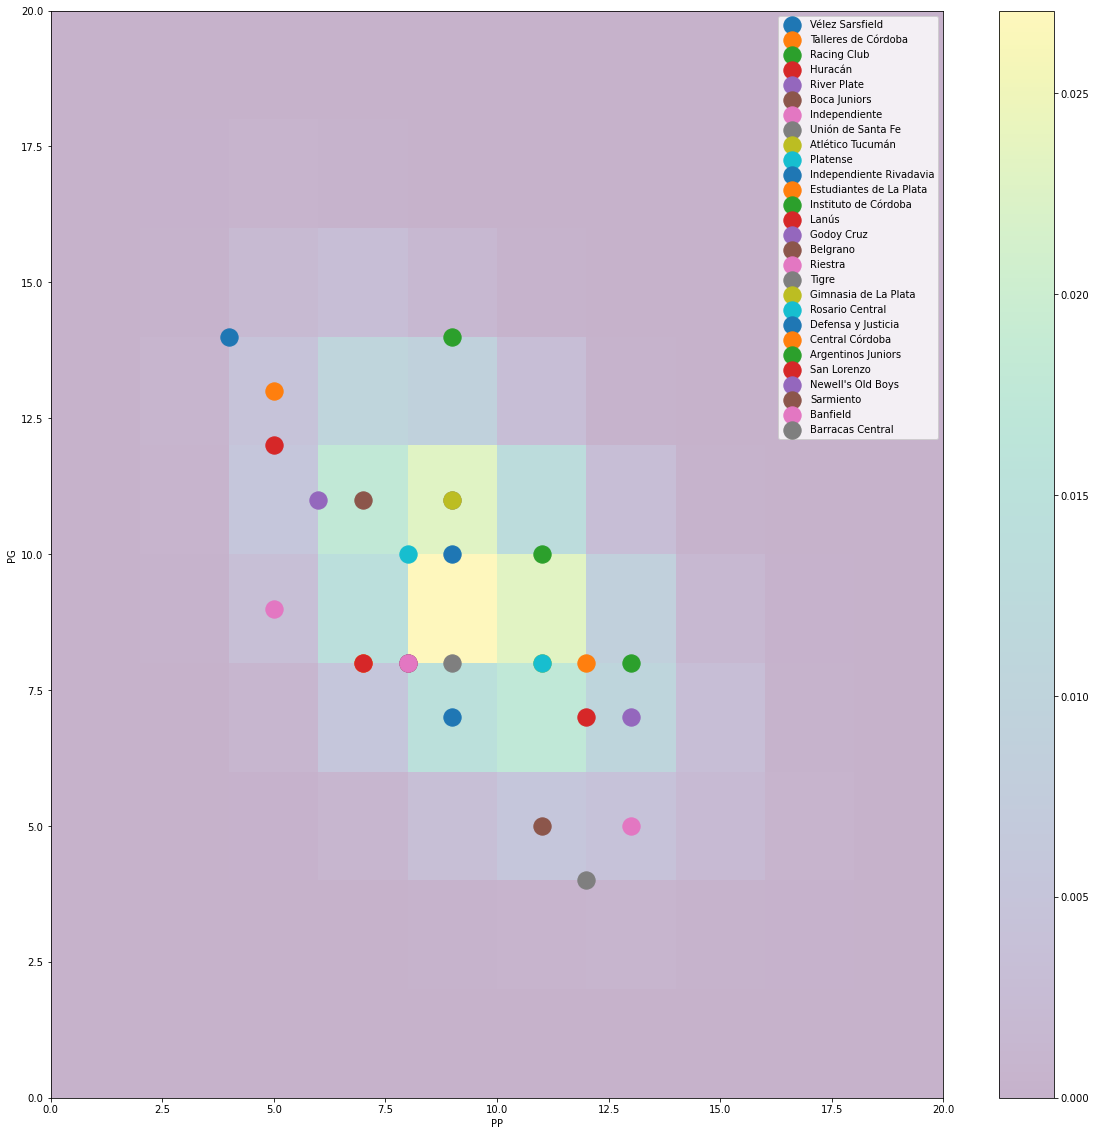

In [13]:
# plt.plot(res[:,0],res[:,1],'.')
# plt.Figure(figsize=(20,20))
plt.hist2d(res[:,0],res[:,1], density=True, alpha = 0.3)
plt.colorbar()


for index, row in data.iterrows():
    # print(data.iindex, row['pg'], row['pp'])
    equipo = data.equipo.iloc[index]
    plt.scatter(row['pp'], row['pg'], s=300, label=equipo)
plt.legend()

plt.xlabel('PP')
plt.ylabel('PG')

In [14]:
res[:,0].max()

20

In [15]:
# version plotly

import plotly.graph_objects as go


# x0 = np.random.randn(100)/5. + 0.5  # 5. enforces float division
# y0 = np.random.randn(100)/5. + 0.5
# x1 = np.random.rand(50)
# y1 = np.random.rand(50) + 1.0

# x = np.concatenate([x0, x1])
# y = np.concatenate([y0, y1])

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.pp.values,
    y=data.pg.values,
    # mode='markers',
    showlegend=False,
    text=data.equipo,
    textposition='top right',
    # textfont=dict(color='#E58606'),
    mode='markers+text',
    marker=dict(
        symbol='x',
        opacity=0.7,
        color='white',
        size=8,
        line=dict(width=1),
    )
))
# fig.add_trace(go.Scatter(
#     x=data.pg.values,
#     y=data.pp.values,
#     mode='markers',
#     showlegend=False,
#     marker=dict(
#         symbol='circle',
#         opacity=0.7,
#         color='white',
#         size=8,
#         line=dict(width=1),
#     )
# ))

fig.add_trace(go.Histogram2d(
    x=res[:,0],
    y=res[:,1],
    colorscale='YlGnBu',
    # zmax=20,
    nbinsx=21,
    nbinsy=21,
    zauto=False,
    histnorm="probability density"
))

fig.update_layout(
    xaxis=dict( ticks='', showgrid=False, zeroline=False, nticks=20 ),
    yaxis=dict( ticks='', showgrid=False, zeroline=False, nticks=20 ),
    autosize=False,
    height=1024,
    width=1024,
    hovermode='closest',

)

fig.show()

un equipo

In [24]:
data.head()

,equipo,puntos,pj,pg,pe,pp,gf,gc,yc,rc
0,Vélez Sarsfield,51,27,14,9,4,38,16,57,5
1,Talleres de Córdoba,48,27,13,9,5,34,27,72,4
2,Racing Club,46,27,14,4,9,42,30,62,2
3,Huracán,46,27,12,10,5,28,18,62,3
4,River Plate,43,27,11,10,6,38,21,71,2


In [30]:
data[data.equipo == 'Vélez Sarsfield'].pg.values

array([14])

In [31]:
# float(data[data.equipo == 'Velez']['pg'])

In [41]:
# Velez

samples = 10000
res = np.zeros((samples,2))

equipo = 'Vélez Sarsfield'

PJ = data.pj.values[0]
PG = data[data.equipo == equipo].pg.values[0]
PP = data[data.equipo == equipo].pp.values[0]
PE = PJ-PG-PP

pvals = [1.0*PG/PJ, 1.0*PP/PJ, 1.0*PE/PJ]

sim = np.random.multinomial(PJ, pvals, size=samples)

In [44]:
def calcularPuntos(x):
    return 3*x[0]+x[1]

In [45]:
calcularPuntos(aux[0])

46

In [38]:
aux

array([[13,  7,  7],
       [10,  2, 15],
       [13,  4, 10],
       ...,
       [13,  2, 12],
       [20,  2,  5],
       [ 8,  4, 15]])

In [47]:
puntos = []
for i in range(sim.shape[0]):
    
    puntos.append(calcularPuntos(sim[i,:]))


# puntos(aux)

(array([   8.,   36.,  284.,  882., 2386., 2706., 2493.,  931.,  251.,
          23.]),
 array([16. , 21.5, 27. , 32.5, 38. , 43.5, 49. , 54.5, 60. , 65.5, 71. ]),
 <BarContainer object of 10 artists>)

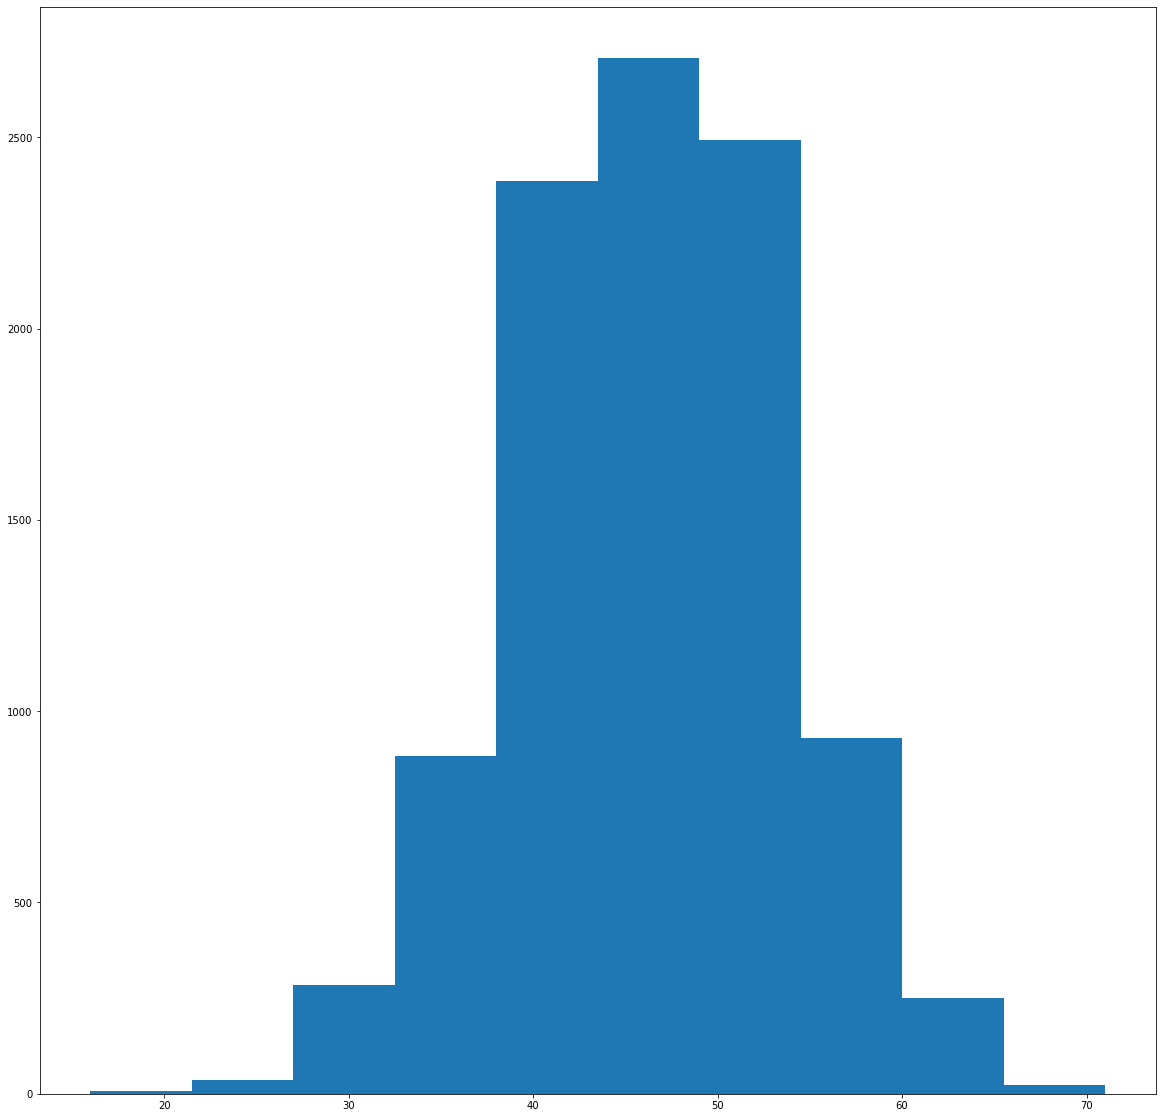

In [49]:
plt.hist(puntos)

todos los equipos

In [ ]:
samples = 10000
# res = np.zeros((samples,2))

equipo = 'Vélez Sarsfield'

PJ = data.pj.values[0]
PG = data[data.equipo == equipo].pg.values[0]
PP = data[data.equipo == equipo].pp.values[0]
PE = PJ-PG-PP

pvals = [1.0*PG/PJ, 1.0*PP/PJ, 1.0*PE/PJ]

sim = np.random.multinomial(PJ, pvals, size=samples)

In [59]:
samples = 10000

PJ = data.pj.values[0]

sims = []

for col in data.equipo:
    data_ = data[data.equipo == col]

    PG = data_.pg.values[0]
    PP = data_.pp.values[0]
    PE = PJ-PG-PP

    pvals = [1.0*PG/PJ, 1.0*PP/PJ, 1.0*PE/PJ]

    sim = np.random.multinomial(PJ, pvals, size=samples)

    puntos = []
    for i in range(sim.shape[0]):
        puntos.append(calcularPuntos(sim[i,:]))

    sims.append(puntos)

In [92]:
# de a un sample

samples = 1000

PJ = data.pj.values[0]

sims_1_campeonato = {}
campeones = []

for j in range(samples):
    for col in data.equipo:
        data_ = data[data.equipo == col]

        PG = data_.pg.values[0]
        PP = data_.pp.values[0]
        PE = PJ-PG-PP

        pvals = [1.0*PG/PJ, 1.0*PP/PJ, 1.0*PE/PJ]

        sim = np.random.multinomial(PJ, pvals, size=1)

        puntos = []
        for i in range(sim.shape[0]):
            puntos.append(calcularPuntos(sim[i,:]))

        sims_1_campeonato[col] = puntos[0]
    
    newData = pd.DataFrame(sims_1_campeonato.items(), columns=['equipo', 'puntos'])
    campeon = newData[newData.puntos.max() == newData.puntos].equipo.values[0] # campeon
    campeones.append(campeon)

    # sims_1_campeonato[col]

    # sims.append(puntos)

(array([109.,  49., 389.,  52., 181.,  20.,  30.,   1.,   0.,  41.,  58.,
          4.,  32.,   7.,   1.,   1.,   5.,   0.,   3.,   3.,   2.,   7.,
          1.,   1.,   1.,   1.,   1.]),
 array([ 0.        ,  0.88888889,  1.77777778,  2.66666667,  3.55555556,
         4.44444444,  5.33333333,  6.22222222,  7.11111111,  8.        ,
         8.88888889,  9.77777778, 10.66666667, 11.55555556, 12.44444444,
        13.33333333, 14.22222222, 15.11111111, 16.        , 16.88888889,
        17.77777778, 18.66666667, 19.55555556, 20.44444444, 21.33333333,
        22.22222222, 23.11111111, 24.        ]),
 <BarContainer object of 27 artists>)

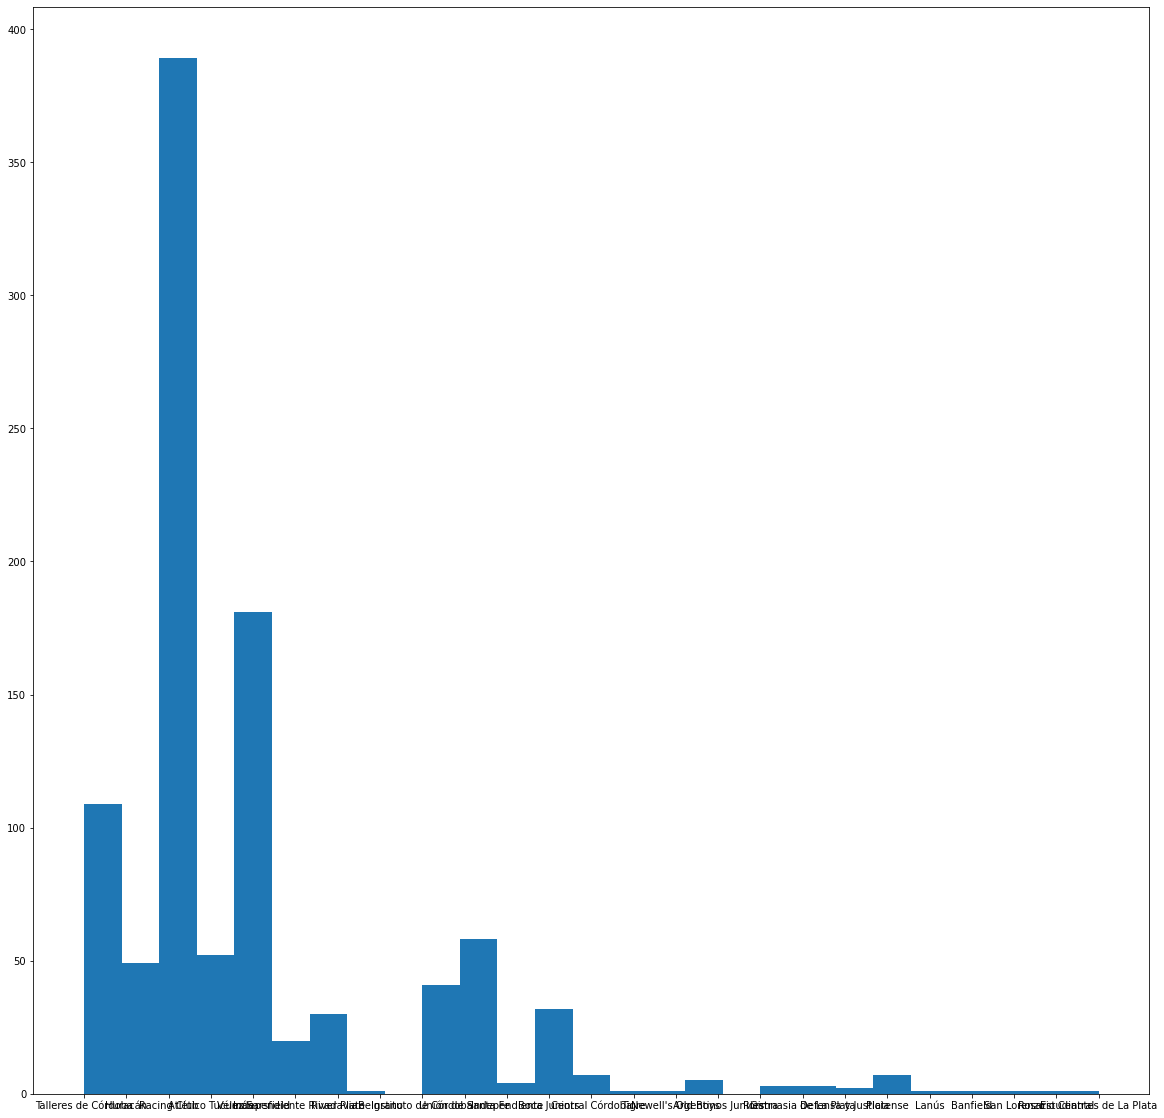

In [96]:
plt.hist(campeones, bins=PJ)

In [169]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(campeones, histnorm="probability density")
fig.show()

pvalor

In [16]:
from scipy.stats import multinomial

In [17]:
pvals

[0.33, 0.33, 0.33]

In [18]:
rv = multinomial(27, pvals)

In [19]:
def multi(pg, pp):
    return rv.pmf([pg, pp, 27-pg-pp])

In [97]:
multi(10, 10)

0.02021423943794228

In [99]:
# pg_ = np.linspace(0,27,28)
# pp_ = np.linspace(0,27,28)

In [101]:
dist = np.zeros((PJ, PJ))

for pg_ in range(PJ):
    for pp_ in range(PJ):
        dist[pg_, pp_] = multi(pg_, pp_)

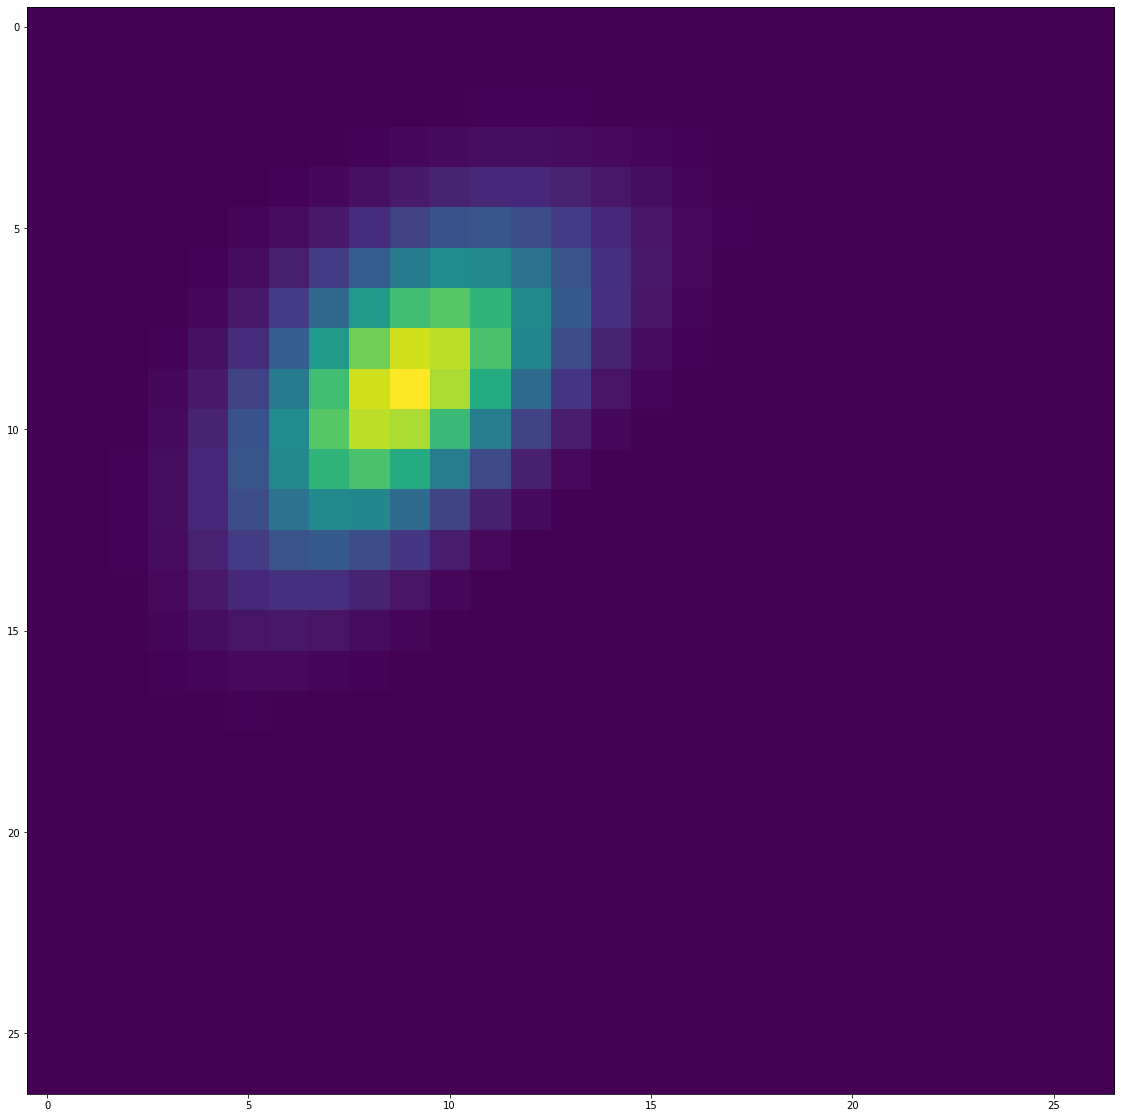

In [103]:
plt.imshow(dist.T)

In [104]:
import plotly.express as px
import numpy as np
# img = np.arange(15**2).reshape((15, 15))
fig = px.imshow(dist)
fig.show()

calculo pvalor como suma ordenada

In [130]:
dist_sorted = np.sort(dist.flatten())

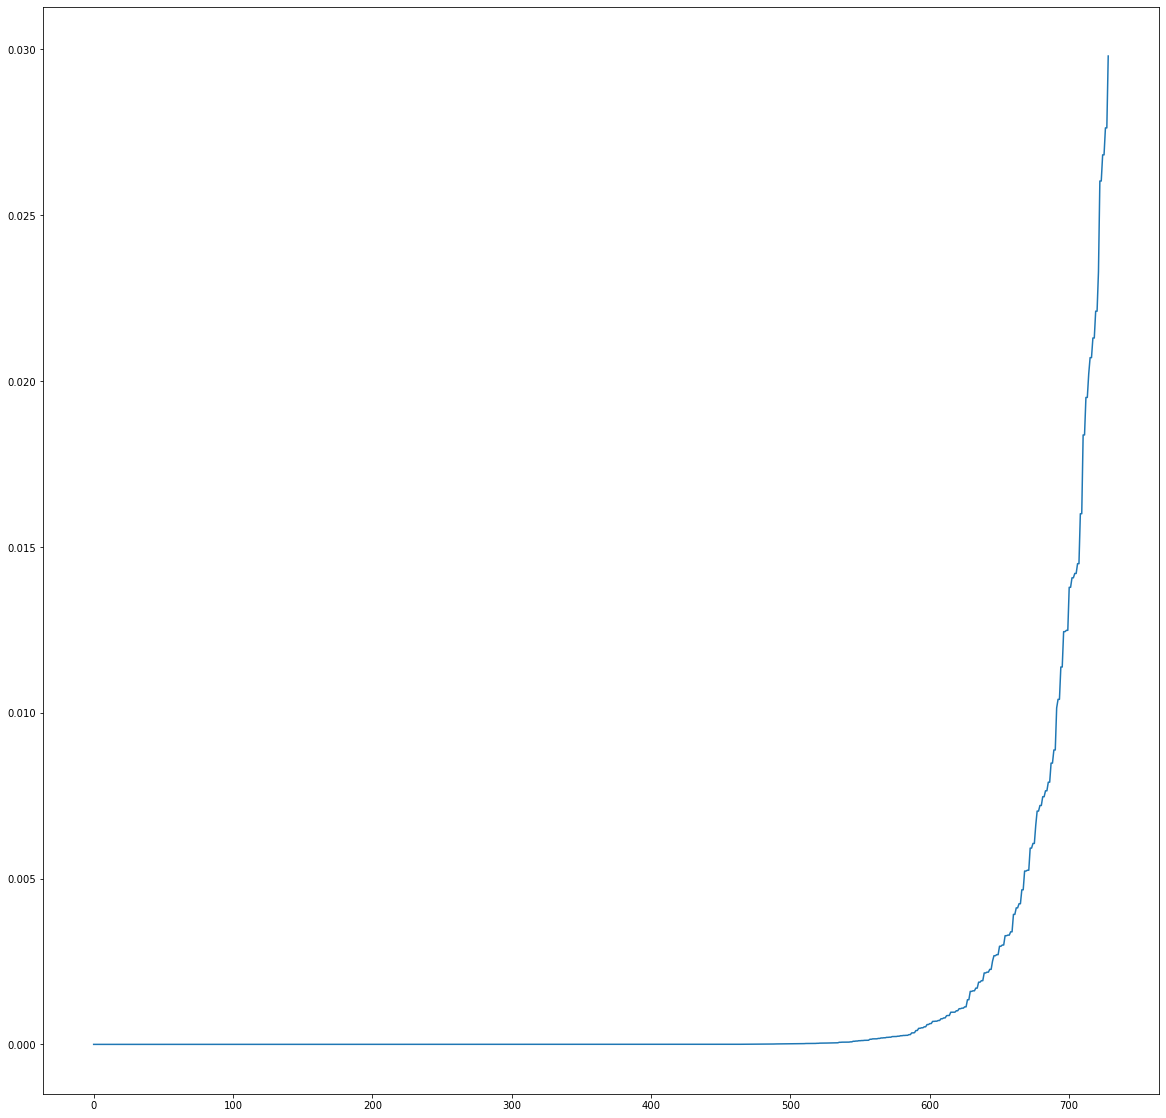

In [131]:
plt.plot(dist_sorted)

In [109]:
dist_sorted.shape

(729,)

In [156]:
pvalor_deseado = 0.05

In [165]:
for i in range(dist_sorted.shape[0]):
    suma = dist_sorted[dist_sorted.shape[0] - i:].sum()
    if suma > 1-pvalor_deseado:
        break

print(i)
pvalor_index = dist_sorted.shape[0] - i

96


In [166]:
mask = np.zeros(dist.shape)
selected = dist_sorted[pvalor_index:]

for i in range(mask.shape[0]):
    for j in range(mask.shape[0]):
        if dist[i,j] in selected:
            mask[i, j] = True

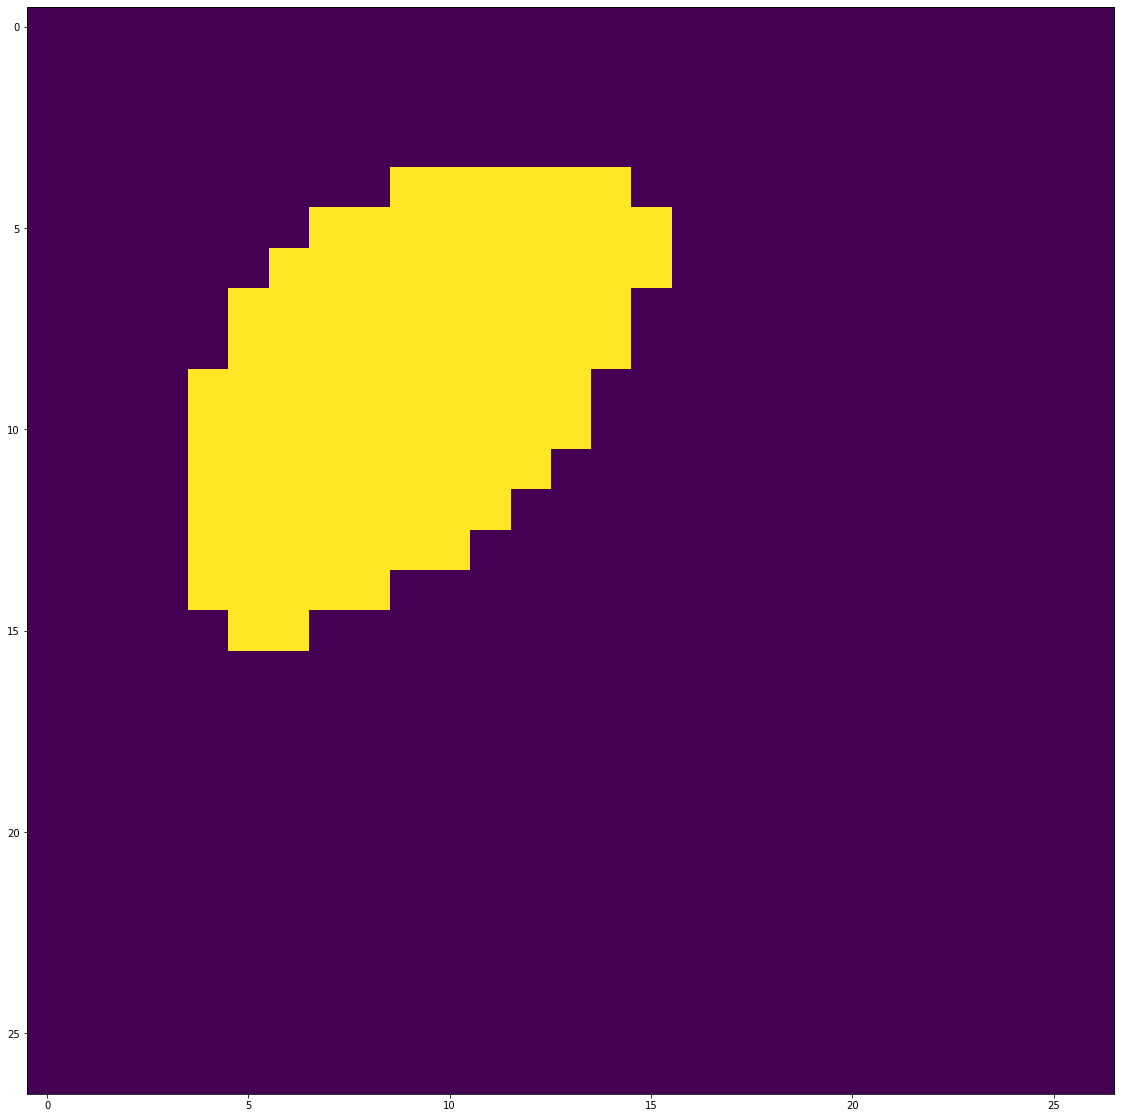

In [167]:
plt.imshow(mask.T)

In [155]:
# version matplotlib

# plt.imshow(mask.T, alpha=0.3)
# plt.colorbar()


# for index, row in data.iterrows():
#     # print(data.iindex, row['pg'], row['pp'])
#     equipo = data.equipo.iloc[index]
#     plt.scatter(row['pp'], row['pg'], s=300, label=equipo)
# plt.legend()



# plt.xlabel('PP')
# plt.ylabel('PG')

In [168]:
# version plotly

import plotly.graph_objects as go


# x0 = np.random.randn(100)/5. + 0.5  # 5. enforces float division
# y0 = np.random.randn(100)/5. + 0.5
# x1 = np.random.rand(50)
# y1 = np.random.rand(50) + 1.0

# x = np.concatenate([x0, x1])
# y = np.concatenate([y0, y1])

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.pp.values,
    y=data.pg.values,
    # mode='markers',
    showlegend=False,
    text=data.equipo,
    textposition='top right',
    # textfont=dict(color='#E58606'),
    mode='markers+text',
    marker=dict(
        symbol='x',
        opacity=0.7,
        color='white',
        size=8,
        line=dict(width=1),
    )
))


fig.add_trace(go.Heatmap(
        z=mask,
        opacity=0.3,
        # x=dates,
        # y=programmers,
        # colorscale='Viridis'
        ))

fig.update_layout(
    xaxis=dict( ticks='', showgrid=False, zeroline=False, nticks=20 ),
    yaxis=dict( ticks='', showgrid=False, zeroline=False, nticks=20 ),
    autosize=False,
    height=1024,
    width=1024,
    hovermode='closest',

)

fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.DataFrame({'world_rank': [1, 2, 3, 4, 5],
                   'university_name': ['Harvard', 'MIT', 'Stanford', 'Cambridge', 'Oxford'],
                   'citations': [98.8, 98.7, 97.6, 97.5, 96]})

layout = dict(plot_bgcolor='white',
              margin=dict(t=20, l=20, r=20, b=20),
              xaxis=dict(title='World Rank',
                         range=[0.9, 5.5],
                         linecolor='#d9d9d9',
                         showgrid=False,
                         mirror=True),
              yaxis=dict(title='Citations',
                         range=[95.5, 99.5],
                         linecolor='#d9d9d9',
                         showgrid=False,
                         mirror=True))

data = go.Scatter(x=df['world_rank'],
                  y=df['citations'],
                  text=df['university_name'],
                  textposition='top right',
                  textfont=dict(color='#E58606'),
                  mode='lines+markers+text',
                  marker=dict(color='#5D69B1', size=8),
                  line=dict(color='#52BCA3', width=1, dash='dash'),
                  name='citations')

fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
# for index, row in data.iterrows():
#     print(index, row['PG'], row['PP'])

In [ ]:
(res[:,0]>15).sum()/samples

BOCA

In [ ]:
# Boca

samples = 100000
res = np.zeros((samples,2))

PJ = 25
PG = float(data[data.index == 'Boca Juniors ']['PG'])
PP = float(data[data.index == 'Boca Juniors ']['PP'])
PE = PJ-PG-PP

pvals = [1.0*PG/PJ, 1.0*PP/PJ, 1.0*PE/PJ]

aux = np.random.multinomial(25, pvals, size=samples)

In [ ]:
# data[data.index == 'Boca Juniors ']['PG'].values
pvals

In [ ]:
# float(data[data.index == 'Boca Juniors ']['PG'])
plt.hist2d(aux[:,1],aux[:,0], density=True, alpha = 0.3)
plt.colorbar()

for index, row in data.iterrows():
    # print(index, row['PG'], row['PP'])
    plt.scatter(row['PP'], row['PG'], s=300, label=index)
plt.legend()

plt.xlabel('PP')
plt.ylabel('PG')